In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [267]:
# Chargement des données
df_repas = pd.read_csv('../../data/SiteNantes/CSV/244400404_nombre-convives-jour-cantine-nantes-2011.csv', sep=';')
df_repas.shape

(138564, 9)

In [268]:
df_repas.head()

,Identifiant du site,Type de site,Date,Prévision,Réel,Nom du site,Nom du site système,Réel système,Prévision système
0,NaN,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,NaN,NaN,NaN
1,NaN,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,NaN,NaN,NaN
2,NaN,M/E,2011-09-05,167.0,171.0,CONTRIE,NaN,NaN,NaN
3,NaN,M,2011-09-05,80.0,64.0,COUDRAY M.,NaN,NaN,NaN
4,NaN,M,2011-09-05,73.0,77.0,FONTENY,NaN,NaN,NaN


On a bien chargé les données 

In [269]:
df_repas.keys()

Index(['Identifiant du site', 'Type de site', 'Date', 'Prévision', 'Réel',
       'Nom du site', 'Nom du site système', 'Réel système',
       'Prévision système'],
      dtype='object')

In [270]:
df_repas.isna().sum()

Identifiant du site    26505
Type de site               0
Date                       0
Prévision               4223
Réel                    4210
Nom du site                0
Nom du site système    56334
Réel système           56334
Prévision système      56334
dtype: int64

Les paramètres suivants ont trop de valeurs manquantes pour être exploitables :

>Nom du site système  
>Réel système  
>Prévision système  

En outre les valeurs existantes sont driectement corrélées à Nom du site, Réel, Prévision et n'apportent pas d'information supplémentaire. On peut donc éliminer ces colonnes ainsi que l'identifiant. 

In [271]:
df_repas.drop(['Identifiant du site', 'Nom du site système', 'Réel système', 'Prévision système'],  axis=1, inplace=True)
df_repas.keys()

Index(['Type de site', 'Date', 'Prévision', 'Réel', 'Nom du site'], dtype='object')

In [272]:
df_repas.isna().sum()

Type de site       0
Date               0
Prévision       4223
Réel            4210
Nom du site        0
dtype: int64

In [273]:
# Avec un sorting sur le nom on fait ressortir des entrées avec des valeurs manquantes
df_repas.sort_values(['Nom du site'], axis=0, ascending=True)

,Type de site,Date,Prévision,Réel,Nom du site
39230,E,2020-04-08,NaN,NaN,102 COUDRAY ELEM
31984,E,2020-04-01,NaN,NaN,102 COUDRAY ELEM
104871,M/E,2020-04-01,NaN,NaN,104 BATIGNOLLES MAT/ELEM
104826,M/E,2020-04-08,NaN,NaN,104 BATIGNOLLES MAT/ELEM
8590,M/E,2020-04-08,NaN,NaN,105 LOUIS PERGAUD MAT/ELEM
...,...,...,...,...,...
42642,M/E,2022-03-22,111.0,109.0,VILLA MARIA
19840,M/E,2016-11-22,148.0,143.0,VILLA MARIA
30288,M/E,2021-05-28,105.0,107.0,VILLA MARIA
117786,M/E,2013-12-05,NaN,NaN,VILLA MARIA


Ici on retrouve les noms de sites "anormaux" débutants par un code à trois chiffres et avec un nombre de repas servis manquants.

In [274]:
df_repas.dropna(subset=['Réel'], axis=0, inplace=True)
df_repas.isna().sum()

Type de site      0
Date              0
Prévision       958
Réel              0
Nom du site       0
dtype: int64

In [275]:
df_repas.sort_values(['Nom du site'], axis=0, ascending=True)

,Type de site,Date,Prévision,Réel,Nom du site
39219,M,2020-04-08,0.0,10.0,606 JOSEPH BLANCHART MAT
8627,M,2020-04-01,0.0,25.0,606 JOSEPH BLANCHART MAT
5724,M/E,2022-02-01,366.0,282.0,AGENETS
49990,M/E,2014-06-20,265.0,227.0,AGENETS
11618,M/E,2015-04-30,295.0,281.0,AGENETS
...,...,...,...,...,...
28470,M/E,2017-09-25,109.0,114.0,VILLA MARIA
104798,M/E,2020-04-10,0.0,0.0,VILLA MARIA
14473,M/E,2017-11-20,112.0,120.0,VILLA MARIA
8593,M/E,2020-04-07,0.0,0.0,VILLA MARIA


On va aussi enlever l'établissement 606 JOSEPH BLANCHART MAT

In [276]:
df_repas= df_repas[df_repas['Nom du site']!='606 JOSEPH BLANCHART MAT']
(df_repas['Nom du site']=='606 JOSEPH BLANCHART MAT').sum()

0

Maintenant nous allons corriger les fautes d'orthographe sur le nom des établissements :
CHENE DARON, GEORGES SAND et COTE DOR

In [277]:
# Nom erroné
(df_repas['Nom du site']=="CHENE DARON").sum()

0

In [278]:
# Nom correct
(df_repas['Nom du site']=="CHENE D'ARON").sum()

1016

In [279]:
# Nom erroné
(df_repas['Nom du site']=="GEORGES SAND").sum()

1268

In [280]:
# Nom correct
(df_repas['Nom du site']=="GEORGE SAND").sum()

264

In [281]:
# Nom erroné
(df_repas['Nom du site']=="COTE DOR").sum()

0

In [282]:
# Nom correct
(df_repas['Nom du site']=="COTE D'OR").sum()

1511

L'élimination des valeurs manquantes a permis d'éliminer 2 fautes d'orthographes sur 3. Il ne reste plus qu'à régler le cas "GEORGE SAND".

In [283]:
df_repas['Nom du site'] = df_repas['Nom du site'].replace({'GEORGES SAND':'GEORGE SAND'})

In [284]:
# Nom erroné
(df_repas['Nom du site']=="GEORGES SAND").sum()

0

In [285]:
# Nom correct
(df_repas['Nom du site']=="GEORGE SAND").sum()

1532

Pour nos besoins nous avons essentiellement besoin d'avoir les valeurs réelles pour effectuer notre propre prédiction.
Nous pouvons garder la colonne 'Prévision' à titre de comparaison avec notre prédiction.

In [286]:
(df_repas==0).sum()

Type de site       0
Date               0
Prévision       2689
Réel            4014
Nom du site        0
dtype: int64

Cela nous fait beaucoup de zéros dans les valeurs alors que cette valeur ne fait pas vraiment sens.

In [287]:
(df_repas['Réel']<10).sum()

4991

In [288]:
(df_repas['Réel']<20).sum()

5643

On voit qu'en plus des zéros on trouve aussi des valeurs trés faibles qui ne semblent pas compatibles avec le fonctionnement normal d'une cantine.

In [289]:
(df_repas['Réel']>600).sum()

30

In [290]:
(df_repas['Réel']>1000).sum()

16

In [291]:
df_repas['Réel'].max()

121552.0

On trouve aussi des valeurs hautes qui n'ont juste pas de sens : aucune des cantines ne peut accueillir des effectifs supérieurs à 1000.

In [292]:
df_repas= df_repas[df_repas['Réel']<=1000]
(df_repas['Réel']>1000).sum()

0

In [293]:
df_repas.shape

(134336, 5)

array([[<AxesSubplot:title={'center':'Réel'}>]], dtype=object)

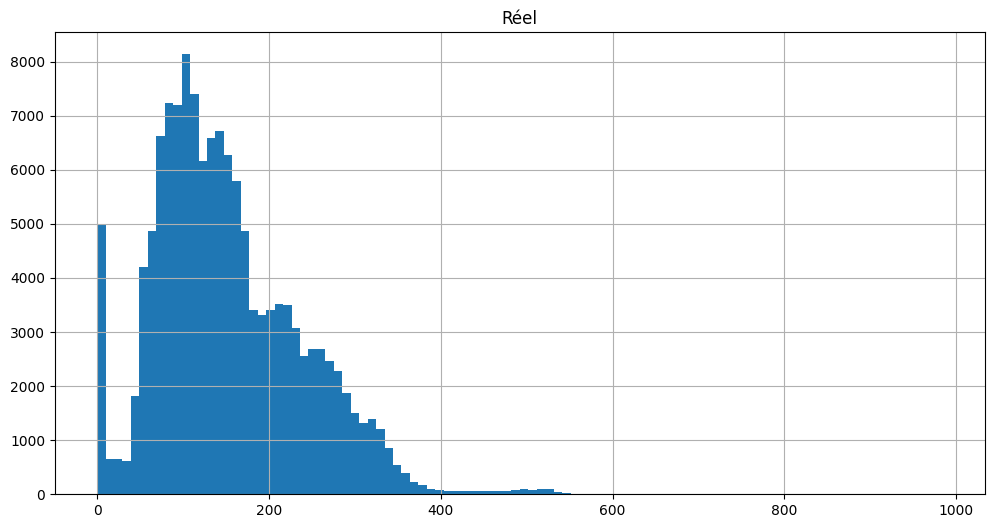

In [294]:
df_repas.hist(['Réel'], bins=100, figsize=(12,6))

Après vérification sur notre feuille excel, une partie des valeurs en dessous de 600 semble légitime mais les valeurs au dessus de 600 ne sont pas réalistes. On va donc également les éliminer ainsi que les zéros.

In [295]:
df_repas= df_repas[df_repas['Réel']<=600]
(df_repas['Réel']>600).sum()

0

In [296]:
df_repas= df_repas[df_repas['Réel']>0]
(df_repas['Réel']==0).sum()

0

array([[<AxesSubplot:title={'center':'Réel'}>]], dtype=object)

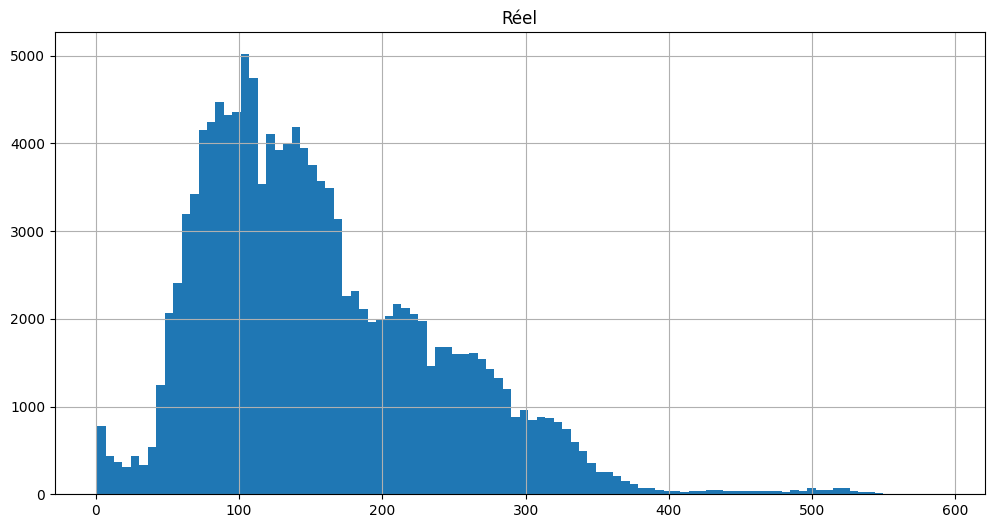

In [297]:
df_repas.hist(['Réel'], bins=100, figsize=(12,6))

In [298]:
datetime.datetime.strptime(df_repas['Date'][0],'%Y-%m-%d').year

2011

On va faire en sorte de mieux détecter les anomalies dans les effectifs de cantine pour chaque établissement. On va calculer la médiane du nombre de repas servis parétablissement et par an, ce qui nous servira de point de référence.

In [299]:
df_repas['An'] = df_repas['Date'].apply(lambda s : datetime.datetime.strptime(s,'%Y-%m-%d').year)
df_repas.head()

,Type de site,Date,Prévision,Réel,Nom du site,An
0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011
1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011
2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011
3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011
4,M,2011-09-05,73.0,77.0,FONTENY,2011


In [300]:
df_EtAnMed = df_repas.groupby(['Nom du site','An']).median()
df_EtAnMed.drop('Prévision', axis=1, inplace=True)
df_EtAnMed.rename(columns={"Réel":"RéelMed"}, inplace=True)
df_EtAnMed.head()

RéelMed
Nom du site An           
AGENETS     2011    249.0
            2012    259.0
            2013    266.5
            2014    282.5
            2015    279.0

In [301]:
df_EtAnMed.shape

(1022, 1)

In [302]:
df_repas=pd.merge(df_repas, df_EtAnMed, on = ['Nom du site','An'], how = "left")
df_repas.head()

,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed
0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0
1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0
2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0
3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0
4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0


In [303]:
df_repas['RéelNorm']=df_repas['Réel']/df_repas['RéelMed']
df_repas.head()

,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm
0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870
1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698
2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427
3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169
4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957


array([[<AxesSubplot:title={'center':'RéelNorm'}>]], dtype=object)

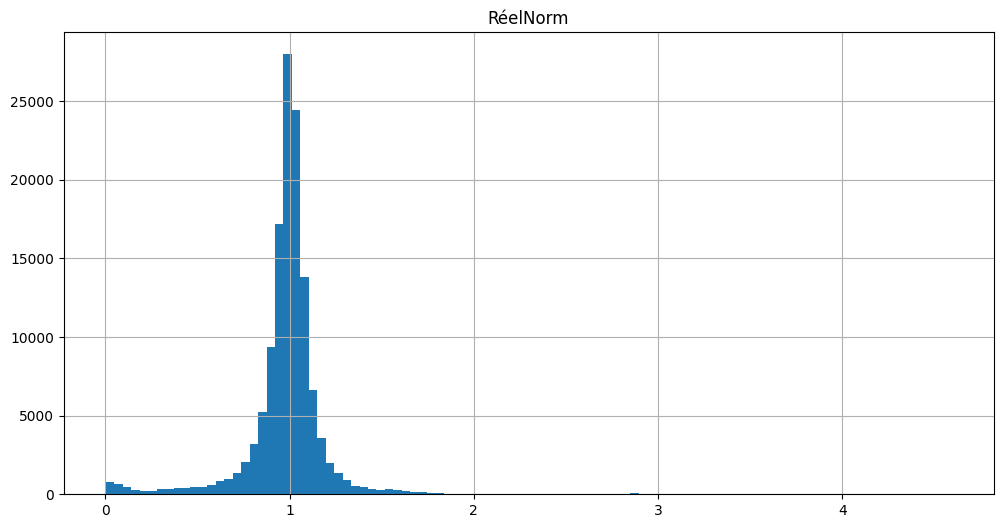

In [304]:
df_repas.hist(['RéelNorm'], bins=100, figsize=(12,6))

La normalisation a fonctionné de façon satisfaisante puisque la distribution est bien centrée sur 1.
Il semble toutefois qu'il y ait encore des déviations excessives.

In [305]:
(df_repas['RéelNorm']>2).sum()

949

In [306]:
df_repas['RéelNorm'].max()

4.590909090909091

In [307]:
(df_repas['RéelNorm']<0.2).sum()

2175

In [308]:
df_repas.sort_values(['RéelNorm'], axis=0, ascending=False)

,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm
9289,M/E,2014-01-21,120.0,505.0,REFORMES,2014,110.0,4.590909
50075,M/E,2021-11-23,395.0,331.0,CONTRIE,2021,73.0,4.534247
5868,M/E,2021-09-28,270.0,326.0,CONTRIE,2021,73.0,4.465753
68486,M/E,2021-01-15,297.0,308.0,CONTRIE,2021,73.0,4.219178
114899,M/E,2021-01-22,297.0,307.0,CONTRIE,2021,73.0,4.205479
...,...,...,...,...,...,...,...,...
12616,E,2018-06-11,2.0,1.0,BOCCAGE E,2018,150.0,0.006667
103504,M/E,2019-09-24,165.0,1.0,PLANTES,2019,153.0,0.006536
45882,E,2016-06-02,157.0,1.0,LEON BLUM,2016,156.5,0.006390
11664,M/E,2019-02-07,315.0,2.0,FRANCOIS DALLET/DOCTEUR TEILLAIS,2019,314.0,0.006369


On va éliminer les déviations excessives :

In [311]:
df_repas= df_repas[df_repas['RéelNorm']<2]
(df_repas['RéelNorm']>2).sum()

0

In [312]:
df_repas= df_repas[df_repas['RéelNorm']>0.2]
(df_repas['RéelNorm']<0.2).sum()

0

array([[<AxesSubplot:title={'center':'RéelNorm'}>]], dtype=object)

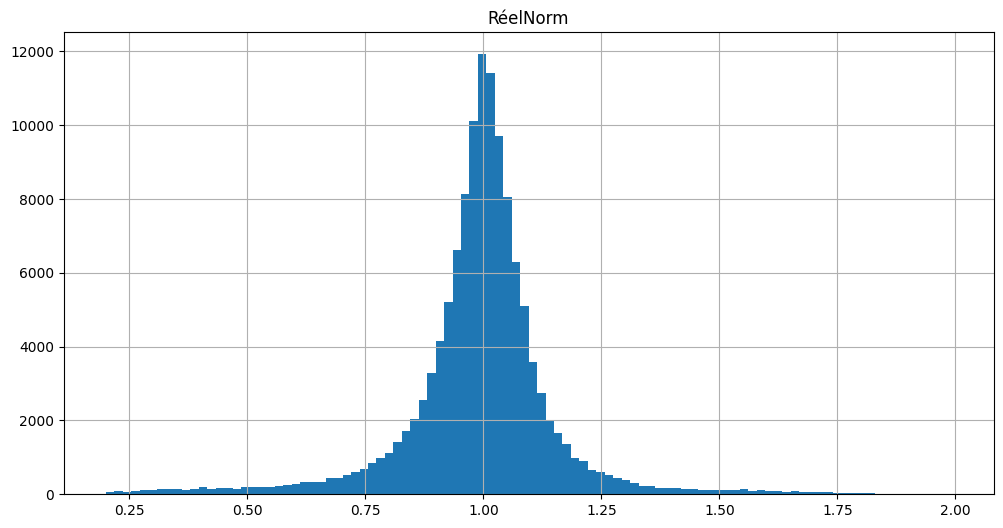

In [313]:
df_repas.hist(['RéelNorm'], bins=100, figsize=(12,6))

Les valeurs retenus semblent désormais raisonnables. Nous pouvons sauvegarder le résultat.

In [314]:
df_repas.to_csv('244400404_effectifs-eleves-cleaned')

In [316]:
df_repas.keys()

Index(['Type de site', 'Date', 'Prévision', 'Réel', 'Nom du site', 'An',
       'RéelMed', 'RéelNorm'],
      dtype='object')